In [4]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2795691 sha256=5736c1f55bd3021302db17895878405632d215312614f44a05a7df508fd0d8c8
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from surprise import Prediction

In [6]:
# Load movie ratings and movie information data
ratings = pd.read_csv('/kaggle/input/movielens-20m-dataset/rating.csv')
movies = pd.read_csv('/kaggle/input/movielens-20m-dataset/movie.csv')

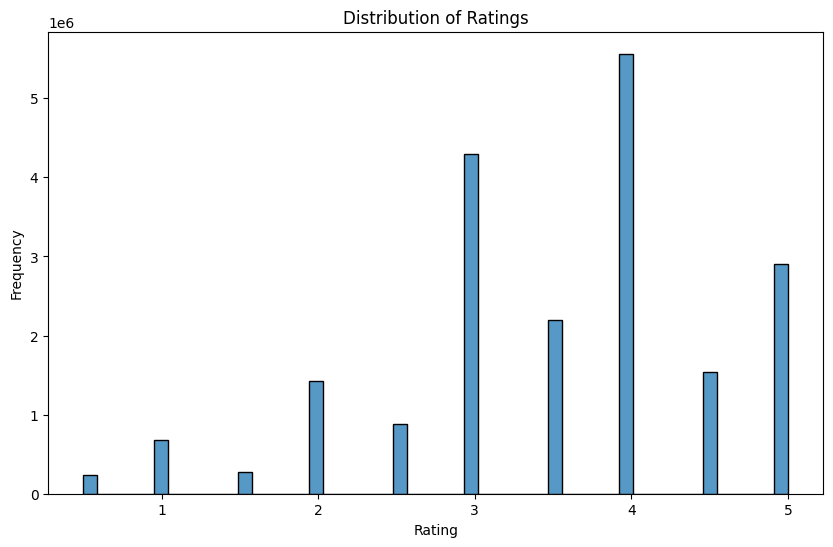

In [7]:
# Visualization of rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=50, kde=False)  # Plot histogram of rating distribution
plt.xlabel('Rating')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Distribution of Ratings')  # Plot title
plt.show()

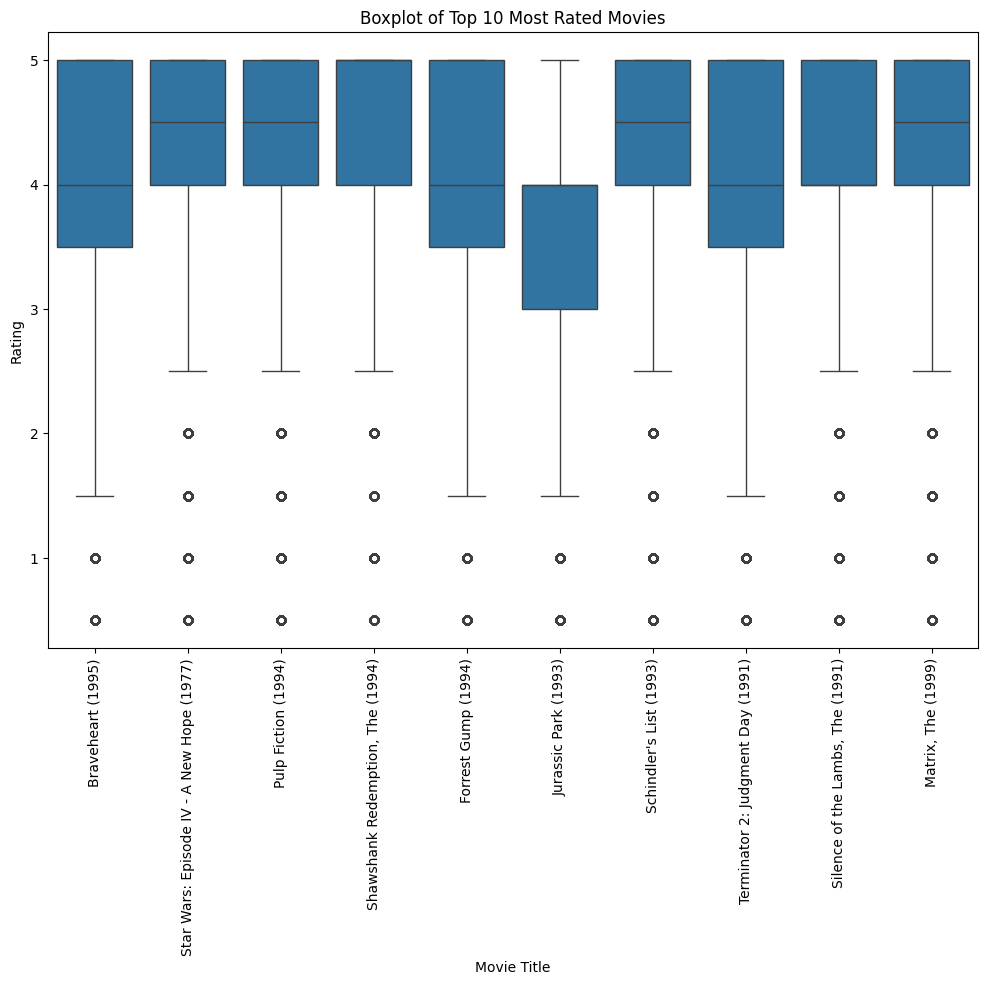

In [8]:
# Visualization of top-10 most rated movies
top_movies = ratings['movieId'].value_counts().head(10).index  # Get IDs of top-10 most rated movies
top_movies_titles = movies[movies['movieId'].isin(top_movies)]  # Get movie titles by ID
top_movies_ratings = ratings[ratings['movieId'].isin(top_movies)]  # Get ratings for top-10 movies

plt.figure(figsize=(12, 8))
sns.boxplot(x='movieId', y='rating', data=top_movies_ratings)  # Plot boxplot for top-10 movies
plt.xticks(ticks=np.arange(10), labels=top_movies_titles['title'], rotation=90)  # X-axis labels (movie titles)
plt.xlabel('Movie Title')  # X-axis label
plt.ylabel('Rating')  # Y-axis label
plt.title('Boxplot of Top 10 Most Rated Movies')  # Plot title
plt.show()

In [9]:
# Data preprocessing
reader = Reader(rating_scale=(0.5, 5.0))  # Define the rating scale
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)  # Load data into Surprise format

In [10]:
# Split data into training and test sets
trainset, testset = train_test_split(data, test_size=0.25)  # 25% of data for testing

In [11]:
# Build the model
model = SVD()  # Initialize the SVD model

# Train the model
model.fit(trainset)  # Fit the model on the training data

In [12]:
# Evaluate the model
predictions = model.test(testset)  # Predict ratings for the test data

In [13]:
# Round predicted values to the nearest acceptable values
def round_rating(rating):
    return round(rating * 2) / 2  # Round to the nearest half-point

rounded_predictions = []
for pred in predictions:
    est = round_rating(pred.est)  # Round the predicted rating
    rounded_predictions.append((pred.uid, pred.iid, pred.r_ui, est, pred.details))  # Append predictions to the list

In [14]:
# Convert predictions to a format understood by accuracy.rmse
rounded_predictions = [Prediction(uid, iid, r_ui, est, details) for (uid, iid, r_ui, est, details) in rounded_predictions]

In [15]:
# Evaluate the model with rounded predictions
rmse = accuracy.rmse(rounded_predictions)  # Compute RMSE for rounded predictions
print(f'RMSE: {rmse}')  # Print RMSE

RMSE: 0.8022
RMSE: 0.8021557245384187


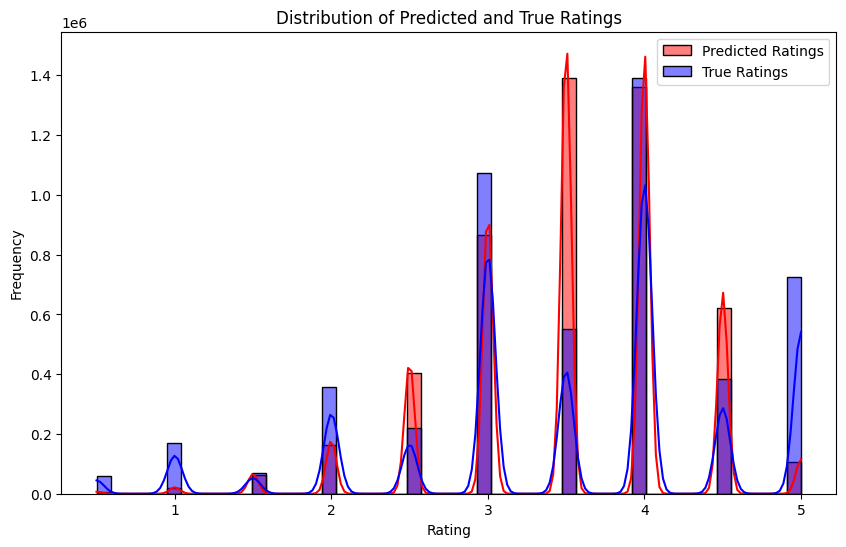

In [16]:
# Visualization of predicted and true values
pred_ratings = np.array([pred.est for pred in rounded_predictions])  # Extract predicted ratings
true_ratings = np.array([pred.r_ui for pred in rounded_predictions])  # Extract true ratings

plt.figure(figsize=(10, 6))
sns.histplot(pred_ratings, color='r', kde=True, label='Predicted Ratings', bins=50)  # Histogram of predicted ratings
sns.histplot(true_ratings, color='b', kde=True, label='True Ratings', bins=50)  # Histogram of true ratings
plt.xlabel('Rating')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Distribution of Predicted and True Ratings')  # Plot title
plt.legend()  # Legend
plt.show()

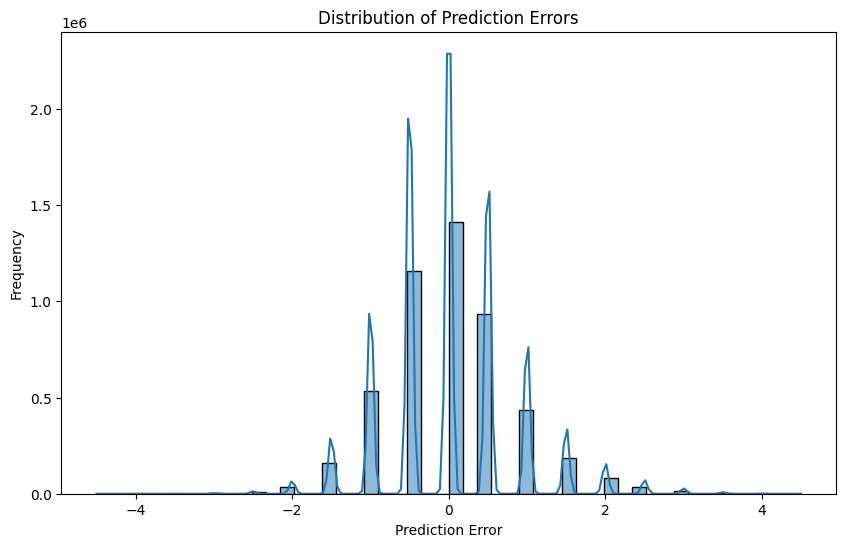

In [17]:
# Visualization of prediction error
errors = pred_ratings - true_ratings  # Compute prediction errors

plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=50, kde=True)  # Histogram of prediction errors
plt.xlabel('Prediction Error')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Distribution of Prediction Errors')  # Plot title
plt.show()